## Review of Introduction to Data, Descriptive Stats, and Hypothesis Testing

## Mean, Median, Mode
How would you find the mean, median, and mode of the following data set by hand?

1, 3, 1, 2, 4


### mean
find the sum then divide by the number of elements in the data set

(1+3+1+2+4)/5 = 2.2

### mode
find the number that occurs most frequently in the data set

1
### median
sort the data then find the midpoint

sorted: 1, 1, 2, 3, 4

midpoint = median = 2

In [1]:
# the python code to do the same
import numpy as np
import scipy.stats as stats
x = [1,3,1,2,4]
print(np.mean(x))
print(np.median(x))
print(stats.mode(x))

2.2
2.0
ModeResult(mode=array([1]), count=array([2]))


## Types of Data or Measurement Scales

Which of the following data sets would be of type nominal? ordinal? interval? ratio?

* The weights of groundhogs trapped at Antietam National Battlefield during the summer of 2018.
* The years various artifacts found in a Viking settlement in Newfoundland were created determined through carbon dating.
* The species of dragonflies caught near Rockcliff Lake in Hardy County, WV.
* The ratings assigned to the quality of coffee beans sourced from organic growers (i.e., poor, good, excellent).



## Variance and Standard Deviation
How would you find the variance and standard deviation of the following data set by hand?

1, 3, 1, 2, 4

### Variance
first, find the deviations of each value from the mean, which was calculated above (2.2)

-1.2, 0.8, -1.2, -0.2, 1.8

next, find the sum of these values squared

1.44 + 0.64 + 1.44 + 0.04 + 3.24 = 6.8

then, divide by the number of elements in the data set minus one.

6.8 / (5-1) = 1.7

### Standard Deviation
take the squareroot of the variance

1.304





In [2]:
# the python code to do the same
import numpy as np
import scipy.stats as stats
x = [1,3,1,2,4]
print(np.var(x,ddof=1)) # ddof = 1 divides by N-1 instead of N
print(np.std(x,ddof=1))

1.7
1.3038404810405297


## Visualizing Data

* How are histograms and bar plots similar and different? 
* Know how to find the approximate location of the mean, median, and mode on a histogram. 
 * If the distribution is normal, then these will all fall at the same location. 
 * If the distribution is skewed, then they will not. For example, if the distribution is skewed left (meaning it has a long tail extending toward lower values on the x axis) then the mean will be smaller than the median and the median will be smaller than the mode. 
* How do you interpret the various components of a box and whisker plot? 

## Python Commands

In [3]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing a CSV file into a pandas dataframe
myDataframe = pd.read_csv('https://raw.githubusercontent.com/prof-groff/evns-462/master/data/cereal.csv')

# viewing the first 10 rows of the dataframe
myDataframe.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
# determining how many rows and columns are in the dataframe
print(myDataframe.shape)

(77, 16)


In [5]:
# extracting a column from the dataframe
fiber = myDataframe['fiber']
print(fiber.head(10)) # print first 10 rows of the fiber column

0    10.0
1     2.0
2     9.0
3    14.0
4     1.0
5     1.5
6     1.0
7     2.0
8     4.0
9     5.0
Name: fiber, dtype: float64


In [6]:
# determining which rows are for cereals with greater than 4 g of fiber per serving
row_indeces = myDataframe['fiber'] > 4 # could also do: fiber > 4 since the variable named fiber is defined above
print(row_indeces.head(10)) # print the first 10 rows of the result

0     True
1    False
2     True
3     True
4    False
5    False
6    False
7    False
8    False
9     True
Name: fiber, dtype: bool


In [7]:
# using the previous result to pull out the rows that are for the high fiber (>6 g per serving) cereals
highFiber = myDataframe[row_indeces]
highFiber

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,120,3,2,160,5.0,12.0,10,200,25,3,1.25,0.67,40.917047
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
58,Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197


## Z-Statistic Hypothesis Testing
Let's try to answer the following question. Is the mean rating of Nabisco cereals (the sample mean, x&#772;) different than the mean overall rating of all cereals in the population (the population mean, &mu;)?

H<sub>0</sub>: There is no difference between &mu; and x&#772;.

H<sub>A</sub>: There is a difference between &mu; and x&#772;.

We will use the <strong>&alpha; = 0.05</strong> significance level. Using a z-table we see that the z-critical value for this significance level for a two-tailed test is <strong>z<sub>critical</sub> = 1.96</strong>.

In [8]:
# to test the hypothesis above, we must first calculate mu and sigma (population statistics)
mu = myDataframe['rating'].mean()
sigma = myDataframe['rating'].std(ddof=0)
print('mu:', mu, 'sigma:', sigma)

# now we must calulate x_bar for just the Nabisco cereals (sample statistic)
Nabisco = myDataframe[myDataframe['mfr']=='N'] # pull out the Nabisco cereals only
x_bar = Nabisco['rating'].mean()
print('x_bar:', x_bar)

# we also need the number of cereals in the sample
N = Nabisco.shape[0] # this is the number of rows in the dataframe
print('N:', N)

# now, we calculate the standard error of the sample mean
SE = sigma/np.sqrt(N)
print('SE:', SE)

# now, calculate the z-statistic and compare it to the critical value
z_stat = (x_bar-mu)/SE
print('z_stat:', z_stat)

mu: 42.66570498701299 sigma: 13.95577448784968
x_bar: 67.96856716666666
N: 6
SE: 5.697421076763826
z_stat: 4.441107974772661


Since z_stat is larger than z_critical, it is very unlikely (less than 5% likely) that one would get this sample mean from a random sample of cereals from the population. Therefore, we reject the null hypothesis and accept the alternative. Nabisco cereals are rated higher than the population average. 

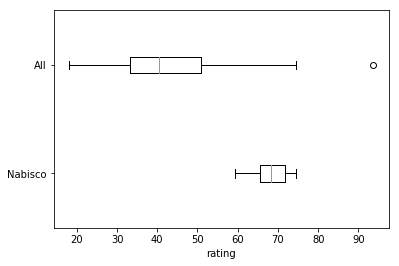

In [9]:
# here is a box and whisker plot of the Nabisco ratings versus the entire population
plt.boxplot([Nabisco['rating'], myDataframe['rating']], vert=False, labels=['Nabisco','All'])
plt.xlabel('rating')
plt.show()